# *Manufacturing Root Cause (Group 3)*

Project members:
- Amine Amri
- Julia Graham
- Sebastian Anusch
- Simone Assirelli 

****************************************************************************************************************************************

Key tasks & decisions by Thursday:
- [X] Missing values (drop or impute?) 
- [ ] Address outliers 
- [X] Data normalization (standard scaler, minmax?)
- [ ] Feature reduction/selection 
- [ ] Merge target column 
- [ ] Prepare PPT 

Tasks
- Simone, Seba, Amine: Coding (Julia to review)
- Julia: presentation (Simone, Seba, Amine to review) 

Meeting - either evening or class breaks from Tuesday

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

Loading the data

In [2]:
url_defects = 'https://dl.dropboxusercontent.com/scl/fi/j3xred1cqmicuxui4kj6m/RC_DEFECTS_clean.csv?rlkey=gumwpqnsfvdyjdx5doi4i7zxb&dl=1'
url_production = 'https://dl.dropboxusercontent.com/scl/fi/baekmodofe2sn64qhrcur/RC_PRODUCTION_clean.csv?rlkey=uw7r9vgblez57cbnwsf2c3vmd&dl=1'
df_def = pd.read_csv(url_defects)
df_prod = pd.read_csv(url_production)

## 1. Exploring the data

In [3]:
print(df_def.shape)
df_def.head()

(617, 10)


,COIL,MT_FROM,MT_TO,DATE,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,389523,0.0,599.0,2019-03-01,0,0,1,0,0,0
1,389523,600.0,1457.0,2019-03-01,0,1,1,0,0,0
2,389528,0.0,1399.0,2019-03-01,0,0,1,0,0,0
3,389528,1400.0,1539.0,2019-03-01,0,0,1,0,1,0
4,389712,0.0,1374.0,2019-03-01,0,0,1,0,0,0


In [4]:
print(df_prod.shape)
df_prod.head()

(299384, 110)


,COIL,DATE,MT,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,...,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
0,240627,2019-03-15,0.0,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,240627,2019-03-15,7.0,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,240627,2019-03-15,14.0,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,240627,2019-03-15,21.0,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,240627,2019-03-15,28.0,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,...,530.110125,14.625,14.625,1956.40875,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Columns of production dataframe
prod_columns = list(df_prod.columns)
print(prod_columns) 

['COIL', 'DATE', 'MT', 'TIME_START_PROCESS', 'SPEED_PROCESS', 'TEMP_Z1', 'TEMP_Z2', 'TEMP_Z3', 'TEMP_Z4', 'TEMP_Z5', 'TEMP_Z6', 'PYRO_1_PRECHMBR', 'PYRO_2_FRST_3_ZONE', 'PYRO_3_LST_3_ZONE', 'LS_OVEN', 'LASER_FRN_1', 'LASER_FRN_2', 'LASER_FRN_3', 'LASER_FRN_4', 'LASER_FRN_5', 'LASER_FRN_6', 'LASER_FRN_7', 'LASER_FRN_8', 'LASER_FRN_9', 'AIR_CH4_1', 'AIR_CH4_2', 'AIR_CH4_3', 'AIR_CH4_4', 'AIR_CH4_5', 'AIR_CH4_6', 'AIR_Z1_1', 'AIR_Z1_2', 'AIR_Z2_1', 'AIR_Z2_2', 'AIR_Z3_1', 'AIR_Z3_2', 'AIR_Z4_1', 'AIR_Z4_2', 'AIR_Z5_1', 'AIR_Z5_2', 'AIR_Z6_1', 'AIR_Z6_2', 'GAS_Z1_1', 'GAS_Z1_2', 'GAS_Z2_1', 'GAS_Z2_2', 'GAS_Z3_1', 'GAS_Z3_2', 'GAS_Z4_1', 'GAS_Z4_2', 'GAS_Z5_1', 'GAS_Z5_2', 'GAS_Z6_1', 'GAS_Z6_2', 'FRN_PHF_PRESSURE', 'FRN_FURNACE_PRESSURE', 'TIRO_FORNO', 'PRES_ZONA1_MEASURED', 'PRES_ZONA1_SET', 'PRES_ZONA2_MEASURED', 'PRES_ZONA2_SET', 'PRES_ZONA3_MEASURED', 'PRES_ZONA3_SET', 'EXT_1', 'EXT_2', 'VENT_1', 'VENT_2', 'VENT_3', 'VENT_4', 'VENT_5', 'COOL_1A', 'COOL_1B', 'COOL_2A', 'COOL_2B', 'COOL

In [6]:
df_prod.describe()

,COIL,MT,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,PYRO_1_PRECHMBR,...,SPZ2_R4,SPZ1_R1_ASS,SPZ1_R2_ASS,TIRO_DECAP,SPEED_FILL,FILL_FORZA,FILL_TIRO,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG
count,2.993840e+05,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,299384.000000,...,283737.000000,283737.000000,283737.000000,283737.000000,270904.000000,270904.000000,270904.000000,270904.000000,270904.000000,270904.000000
mean,4.210808e+05,1013.750454,36.030174,1236.378668,1257.600788,1266.031784,1279.476562,1293.618170,1281.422092,802.675699,...,526.644078,18.292673,18.344328,3186.598116,39.900765,689.840763,3610.710095,0.532809,0.164599,0.169975
std,2.484114e+05,874.832131,11.243607,87.092407,87.833443,87.717798,85.313536,88.576110,84.233837,38.910802,...,34.108621,2.699142,2.794101,1306.570596,17.267686,279.623230,982.734142,0.232301,0.040681,0.038671
min,2.406270e+05,0.000000,-2.304028,79.722742,74.225453,74.198610,77.426415,78.567278,79.205925,549.382500,...,-3.665034,0.000000,0.000000,856.680000,-1.809788,-496.040375,-48.285825,0.000000,-0.011853,-0.016642
25%,3.947170e+05,378.000000,28.063851,1236.605625,1259.813250,1271.021625,1260.090000,1261.445625,1271.056781,795.292844,...,529.919898,16.875000,16.875000,2333.722500,28.351013,496.627351,2946.052969,0.470936,0.134999,0.135002
50%,4.037420e+05,812.000000,33.685521,1261.473750,1272.760476,1278.000540,1286.188125,1317.151607,1293.406875,811.525114,...,530.125500,18.000000,18.000000,2901.962812,37.656312,662.102578,3790.602141,0.559548,0.135037,0.161994
75%,4.146100e+05,1400.000000,44.908965,1270.924798,1293.924375,1303.419825,1316.148750,1333.189687,1313.704765,823.938673,...,530.315100,20.248013,20.250000,4021.551000,49.828513,837.825196,4217.453156,0.572413,0.188993,0.189022
max,6.838679e+06,7273.000000,67.408785,1322.268750,1344.982500,1357.508250,1348.341750,1367.288438,1362.536250,931.753875,...,541.123650,31.405500,32.747692,9073.901250,90.010696,2933.876250,6257.584687,7.342893,0.679614,0.324028


#### Adjustment of the 'MT' column
Since there are inconsistencies along the 'MT' column, i.e. there are coils with an inconsistent sequence of meters, we addressed this problem by creating a new variable 'MT_ADJUSTED' that ensures a correct sequence of meters (one observation every 7 meters)

In [7]:
df_prod.sort_values(['COIL', 'DATE', 'TIME_START_PROCESS'], inplace=True)
df_prod['MT_ADJUSTED'] = df_prod.groupby(['COIL'])['MT'] \
                          .transform(lambda x: np.arange(0., len(x) * 7, 7.))
df_prod.drop('MT', axis=1, inplace=True)

## 2. Merging procedure

Attaching production information only over coils with defects

In [8]:
merged_defects = df_prod.merge(df_def, on=['COIL', 'DATE'], how='inner') # By doing so you obtain only the 
                                                                         # observations with defects
print(merged_defects.shape)

merged_defects = merged_defects[(merged_defects['MT_ADJUSTED'] >= merged_defects['MT_FROM']) & 
                      (merged_defects['MT_ADJUSTED'] < merged_defects['MT_TO'])] # This filtering is needed as you 
                                                                                 # want to specify that 
                                                                                 # 'MT_ADJUSTED' must be be found 
                                                                                 # inside the defect range 
merged_defects.drop_duplicates(['COIL', 'DATE', 'MT_ADJUSTED'], inplace=True)
merged_defects.drop(['MT_FROM', 'MT_TO'], axis=1, inplace=True)
print(merged_defects.shape)

(131179, 118)
(106075, 116)


In [9]:
lst_col_labels = ['COIL', 'DATE', 'MT_ADJUSTED']+[i for i in merged_defects.columns if 'DIF_TIPO' in i]
merged_defects = merged_defects[lst_col_labels]
merged_final = df_prod.merge(merged_defects, on = ['COIL', 'DATE', 'MT_ADJUSTED'], how='left')
merged_final.head()

,COIL,DATE,TIME_START_PROCESS,SPEED_PROCESS,TEMP_Z1,TEMP_Z2,TEMP_Z3,TEMP_Z4,TEMP_Z5,TEMP_Z6,...,FILL_ALL,FILL_BENDING_POS,FILL_BENDING_NEG,MT_ADJUSTED,DIF_TIPO_1,DIF_TIPO_2,DIF_TIPO_3,DIF_TIPO_4,DIF_TIPO_5,DIF_TIPO_6
0,240627,2019-03-15,14:25:23.060,16.934625,671.967562,679.751438,688.119187,716.717250,734.616563,734.603062,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,240627,2019-03-15,14:25:53.060,16.773638,668.635875,676.207125,681.034500,710.093250,729.040500,727.025625,...,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2,240627,2019-03-15,14:26:23.060,11.142165,669.105375,677.042625,678.493125,707.967750,727.783500,724.035750,...,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
3,240627,2019-03-15,14:27:08.060,11.148851,671.631750,681.066000,679.704750,707.241375,727.886250,723.072375,...,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN
4,240627,2019-03-15,14:27:38.060,15.657188,675.052875,686.972813,683.336250,710.432437,730.182375,724.168688,...,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN


After this process, 'merged_final' contains the production data with defect information correctly applied. Each row in 'merged_final' represents production data, and if there were any defects associated with the particular meter range of a coil, this information is now included in the corresponding rows.

Downloading the merged data in a csv format (in case you want to visualize it on Excel) \
P.S. Do not run this if you don't want to download it!

In [13]:
# ! pip install openpyxl
# merged_df.to_excel('merged_data.xlsx', index=False, engine='openpyxl')

## 3. Dealing with Missing Values

Question: Are there missing values in the ['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6'] columns?

In [10]:
merged_final[['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 
           'DIF_TIPO_5', 'DIF_TIPO_6']].isna().sum()

DIF_TIPO_1    193309
DIF_TIPO_2    193309
DIF_TIPO_3    193309
DIF_TIPO_4    193309
DIF_TIPO_5    193309
DIF_TIPO_6    193309
dtype: int64

Answer: Yes. Therefore, we need to convern Null values to 0s for observations that have no defects

In [11]:
# List of defect columns - replace or extend this with your actual defect column names
defect_columns = ['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']

# Replace NaN values with 0 in defect columns
for col in defect_columns:
    merged_final[col] = merged_final[col].fillna(0)

merged_final[['DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 
           'DIF_TIPO_5', 'DIF_TIPO_6']].isna().sum()

DIF_TIPO_1    0
DIF_TIPO_2    0
DIF_TIPO_3    0
DIF_TIPO_4    0
DIF_TIPO_5    0
DIF_TIPO_6    0
dtype: int64

In [12]:
# Checking overall missing values
merged_final.isna().sum().sum()

908899

Let's visualize missing values with a bar chart

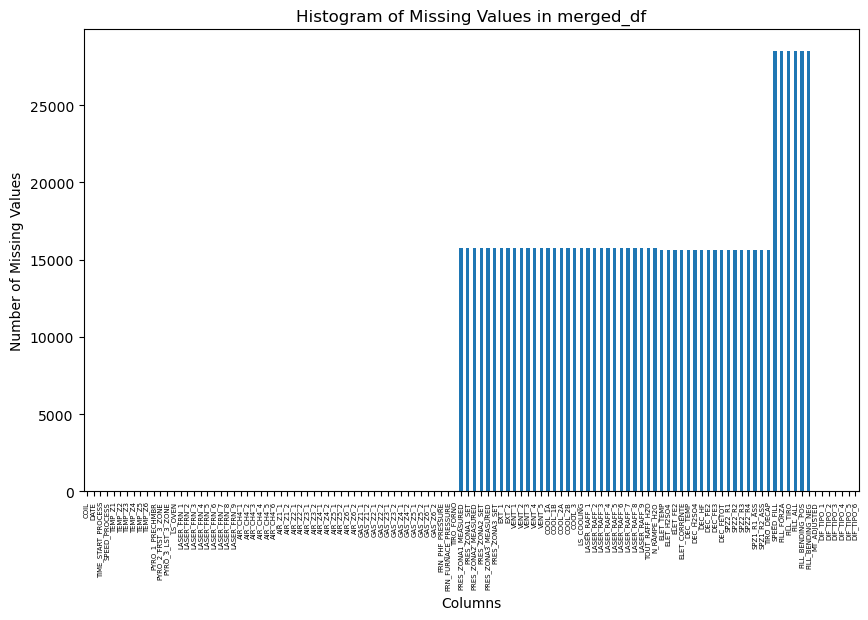

In [13]:
missing_values = merged_final.isna().sum()

plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Histogram of Missing Values in merged_df')
plt.xticks(rotation=90, fontsize = 5)
plt.show()

In order to deal with the missing values, we decided to procceed with imputing the mean of each column, since the loss of information deriving from the elimination of columns would be too significant

In [14]:
for column in merged_final.columns:
    # Check if the column is numeric (float or int)
    if pd.api.types.is_numeric_dtype(merged_final[column]):
        # Calculate the mean of the current column, skipping NaN values
        mean_value = merged_final[column].mean()
        
        # Replace NaNs in the column with the mean value
        merged_final[column].fillna(mean_value, inplace=True)

In [42]:
# Checking overall missing values
print(f'After imputation we end up with {merged_final.isna().sum().sum()} missing values in the dataset')

After imputation we end up with 0 missing values in the dataset


## 4. Dealing with Outliers

In [56]:
merged_final_columns = merged_final.columns
# Define the function to detect outliers
def detect_outliers_iqr(merged_final_columns):
    outliers = []
    data = sorted(merged_final_columns)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3 - q1
    lwr_bound = q1 - (1.5 * IQR)
    upr_bound = q3 + (1.5 * IQR)
    for i in merged_final_columns:
        if (i < lwr_bound or i > upr_bound):
            outliers.append(i)
    return outliers

# Driver code
sample_outliers = detect_outliers_iqr(merged_final['FRN_FURNACE_PRESSURE'])
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [-1.8239615710804262, -1.6015631045540784, -1.8111734765601877, -1.8187996076488187, -1.9232585036340193, -2.093761632520724, -2.002091938298025, -1.936068742999524, -1.8892805602994542, -1.950389814433332, -1.9771108919740839, -1.9178618048425875, -1.9024080245734012, -1.9195453667039686, -2.0271167206913674, -2.0368145020546744, -1.973107657571043, -1.9997861062846567, -2.064225945146607, -2.185407521034761, -2.2441655462224745, -2.2744702133484687, -2.283875129133126, -2.306808884512185, -2.339888854371196, -2.3720708507546524, -2.382172775544071, -2.3374495996650975, -2.312220531074172, -2.2947061729529428, -2.2766930021920877, -2.2453320259468845, -2.196173791182174, -2.1962889443775593, -2.18817009048175, -2.15812341080311, -2.353661840884659, -2.414267299788725, -2.356437143617676, -2.364381606857012, -2.3532632336698636, -2.4057653400698067, -2.4406861001915905, -2.306410277297389, -2.506038306678518, -2.5835712853042527, -2.821494949225771, -2.994466

Text(0.5, 0, 'Sample')

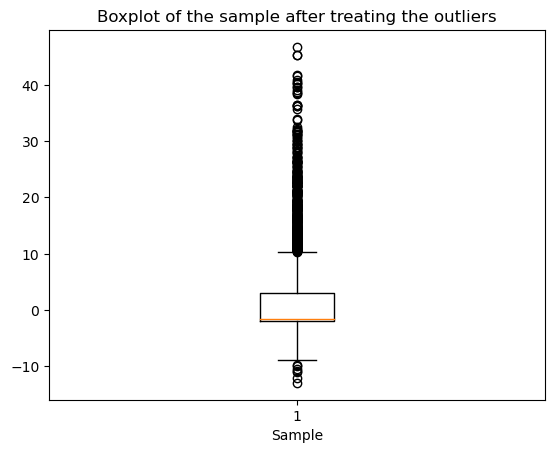

In [55]:
# plot outliers using boxplot
plt.boxplot(detect_outliers_iqr(merged_final['FRN_FURNACE_PRESSURE']))
plt.title("Boxplot of the sample after treating the outliers")
plt.xlabel("Sample")

## 5. Normalization

In [16]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform it
# You might want to select only numeric columns for scaling
numeric_cols = merged_final.select_dtypes(include=['float64', 'int64']).columns
merged_final[numeric_cols] = scaler.fit_transform(merged_final[numeric_cols])

'merged_final' now contains the normalized data

## 6. Feature Selection

The number of features is definetely too high. We should approach this problem by eliminating  redundant or irrelevant information, and focusing on the most important features that contribute to our target variable. 
We followed a simple strategy, i.e. we set a threshold for correlation (0.65) and deleted the features whose correlation exceeded this threshold.

In [17]:
# Assuming merged_final is your DataFrame
numeric_data = merged_final.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.65)]

# Drop highly correlated features
df_reduced = merged_final.drop(to_drop, axis=1)

In [18]:
df_reduced.shape

(299384, 45)

In [19]:
prod_columns = list(df_reduced.columns)
print(prod_columns) 

['COIL', 'DATE', 'TIME_START_PROCESS', 'SPEED_PROCESS', 'TEMP_Z1', 'PYRO_2_FRST_3_ZONE', 'LASER_FRN_1', 'LASER_FRN_2', 'LASER_FRN_8', 'LASER_FRN_9', 'AIR_CH4_1', 'AIR_CH4_2', 'AIR_CH4_3', 'AIR_CH4_4', 'AIR_CH4_5', 'AIR_CH4_6', 'AIR_Z1_1', 'FRN_FURNACE_PRESSURE', 'PRES_ZONA1_MEASURED', 'PRES_ZONA1_SET', 'PRES_ZONA3_MEASURED', 'EXT_1', 'TOUT_RAFF_H2O', 'N_RAMPE_H2O', 'ELET_TEMP', 'ELET_H2SO4', 'ELET_FE2', 'DEC_TEMP', 'DEC_H2SO4', 'DEC_FE2', 'DEC_FE3', 'SPZ2_R1', 'SPZ2_R3', 'SPZ1_R1_ASS', 'FILL_FORZA', 'FILL_TIRO', 'FILL_ALL', 'FILL_BENDING_POS', 'MT_ADJUSTED', 'DIF_TIPO_1', 'DIF_TIPO_2', 'DIF_TIPO_3', 'DIF_TIPO_4', 'DIF_TIPO_5', 'DIF_TIPO_6']


## 5. ML Algorithm TBD